Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9536 - loss: 0.1469 - val_accuracy: 0.9870 - val_loss: 0.0470
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9848 - loss: 0.0491 - val_accuracy: 0.9883 - val_loss: 0.0418
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9887 - loss: 0.0353 - val_accuracy: 0.9870 - val_loss: 0.0416
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9921 - loss: 0.0246 - val_accuracy: 0.9880 - val_loss: 0.0388
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9937 - loss: 0.0186 - val_accuracy: 0.9905 - val_loss: 0.0371
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9909 - loss: 0.0290
Test accuracy: 0.9909


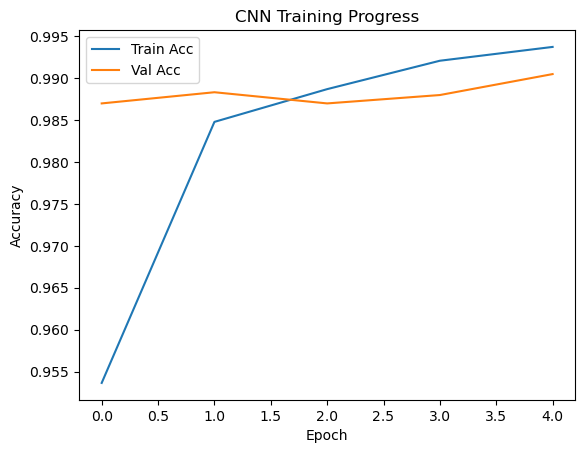

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# بارگذاری داده
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# ساخت مدل CNN 
model = keras.Sequential([layers.Input(shape=(28,28,1)),layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),layers.Conv2D(64, (3, 3), activation='relu'),layers.MaxPooling2D((2, 2)),
    layers.Flatten(),layers.Dense(64, activation='relu'),layers.Dense(10, activation='softmax')])

# کامپایل
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#  آموزش 
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=1)

#  ارزیابی 
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

#  نمایش نمودار 
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training Progress')
plt.show()
